**Project Name :** Book Recommendation System

**Project Objective:**

*   This project is all about recomendation system.
*   In this project we have tried to use some approches for recomending the  
    books to the readers or users.
*   We will be using various ways such as collaborative Filtering and Content based
    Filtering for recomendation of the books to the users .



    



**Dataset:**

*   We have three different datsets namely book.csv which contains information
    about the books such as book-author , publisher , book title , year of publication, image links and unique Book ID i.e ISBN Number .
*   Then we have ratings.csv which contain information about ratings given by
    the users for the books, it contains user ID ,ISBN number and book rating (scale between 1-10).
*   Then we have users.csv which contain information about users such as their
    location , age and their user ID.   






**Importing necessary libraries**

In [61]:
#pip install surprise

In [62]:
#pip install scikit-surprise

In [63]:
#conda install -c conda-forge scikit-surprise

In [64]:
# for dealing with regular expression techniques
import re
import requests
import random
#for NLP related tasks
from sklearn.feature_extraction.text import CountVectorizer
import nltk

# basic libraries
import pandas as pd
import numpy as np


import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
#for TF-IDF vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
# for finding similarity
from sklearn.metrics.pairwise import cosine_similarity

import scipy
import math
import sklearn
#for removing stopwords
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
#for SVD model
from scipy.sparse.linalg import svds
# for plotting graphs
import matplotlib.pyplot as plt

from surprise import Dataset, Reader
from surprise import SVD, NMF
from surprise.model_selection import cross_validate, train_test_split, GridSearchCV

**Loading the datasets**

In [65]:
df_books=pd.read_csv('Books.csv', encoding='latin-1')
df_books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,60973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [66]:
df_ratings=pd.read_csv('Ratings.csv', encoding='latin-1')
df_ratings

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,155061224,5
2,276727,446520802,0
3,276729,052165615X,3
4,276729,521795028,6
...,...,...,...
1048570,250764,451410777,0
1048571,250764,452264464,8
1048572,250764,048623715X,0
1048573,250764,486256588,0


In [67]:
df_users=pd.read_csv('Users.csv', encoding='latin-1')
df_users

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


**Basic dataset information**

In [68]:
df_books.info()
df_books.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [6]:
df_ratings.info()
df_ratings.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1048575 non-null  int64 
 1   ISBN         1048575 non-null  object
 2   Book-Rating  1048575 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')

In [7]:
df_users.info()
df_users.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


Index(['User-ID', 'Location', 'Age'], dtype='object')

In [8]:
df_books.describe()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271360,271358,271360,271358,271360,271360,271357
unique,271360,242131,102022,202,16806,271044,271044,271041
top,195153448,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/225307649X.0...
freq,1,27,632,13903,7535,2,2,2


In [9]:
df_ratings.describe()

,User-ID,Book-Rating
count,1.048575e+06,1.048575e+06
mean,1.285089e+05,2.879907e+00
std,7.421876e+04,3.857870e+00
min,2.000000e+00,0.000000e+00
25%,6.339400e+04,0.000000e+00
50%,1.288350e+05,0.000000e+00
75%,1.927790e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


In [10]:
df_users.describe()

,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


**Unique Values**

In [11]:
df_books.nunique()

ISBN                   271360
Book-Title             242131
Book-Author            102022
Year-Of-Publication       202
Publisher               16806
Image-URL-S            271044
Image-URL-M            271044
Image-URL-L            271041
dtype: int64

In [12]:
df_ratings.nunique()

User-ID         95513
ISBN           322473
Book-Rating        11
dtype: int64

In [13]:
df_users.nunique()

User-ID     278858
Location     57339
Age            165
dtype: int64

**Duplicate Values**

In [14]:
print("Duplicate Values in BOOKS" ,len(df_books[df_books.duplicated()]))
print("Duplicate Values in RATINGS ",len(df_ratings[df_ratings.duplicated()]))
print("Duplicate Values in USERS",len(df_users[df_users.duplicated()]))

Duplicate Values in BOOKS 0
Duplicate Values in RATINGS  72
Duplicate Values in USERS 0


**Finding and handling missing values**

NULL Values in BOOKS ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64


<Figure size 1000x600 with 0 Axes>

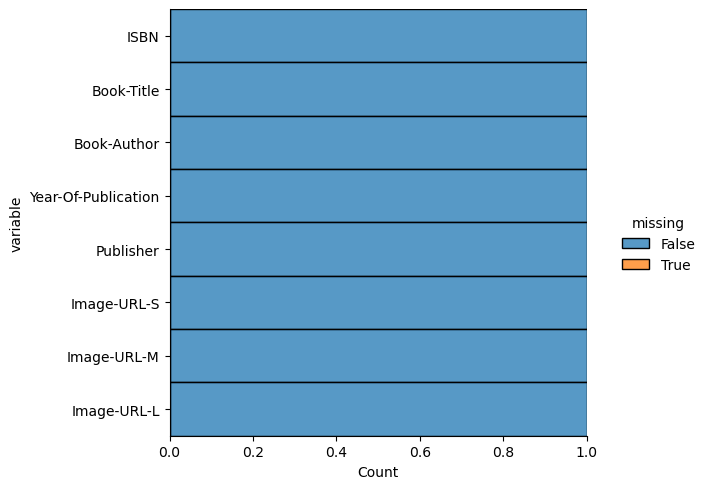

In [15]:
print("NULL Values in BOOKS" ,df_books.isnull().sum())
# Visualizing the missing values
plt.figure(figsize=(10,6))
sns.displot(
    data=df_books.isnull().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)

NULL Values in RATINGS  User-ID        0
ISBN           0
Book-Rating    0
dtype: int64


<Figure size 1000x600 with 0 Axes>

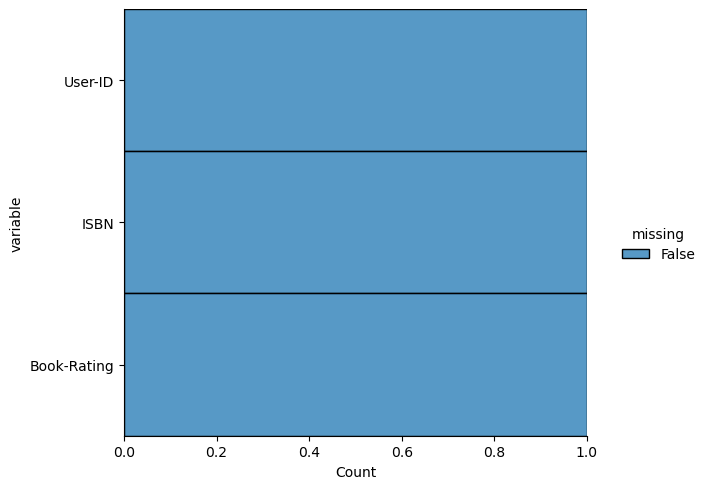

In [16]:
print("NULL Values in RATINGS ",df_ratings.isnull().sum())
# Visualizing the missing values
plt.figure(figsize=(10,6))
sns.displot(
    data=df_ratings.isnull().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)

NULL Values in USERS User-ID          0
Location         0
Age         110762
dtype: int64


<Figure size 1000x600 with 0 Axes>

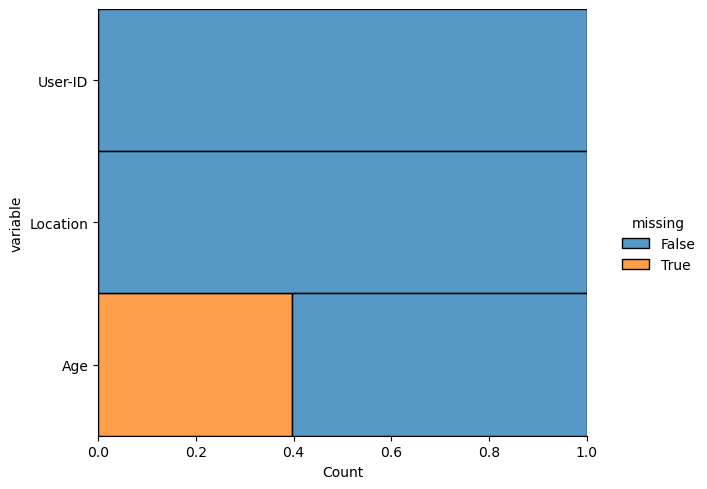

In [17]:
print("NULL Values in USERS",df_users.isnull().sum())
# Visualizing the missing values
plt.figure(figsize=(10,6))
sns.displot(
    data=df_users.isnull().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)

**Handling missing values**

In [18]:
df_users["Age"].fillna(df_users.Age.median(),inplace=True)
print("NULL Values in USERS",df_users.isnull().sum())

NULL Values in USERS User-ID     0
Location    0
Age         0
dtype: int64


**Fixing wrong values**

In [19]:
df_books['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [20]:
# checking the data where the 'Year-Of-Publication' is 'DK Publishing Inc'
df_books.loc[df_books['Year-Of-Publication'] == 'DK Publishing Inc',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
221678,789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


In [21]:
#Fixing the wrongly inputed values
#ISBN '0789466953'
df_books.loc[df_books.ISBN == '0789466953','Year-Of-Publication'] = 2000
df_books.loc[df_books.ISBN == '0789466953','Book-Author'] = "James Buckley" # this we gathered from the google
df_books.loc[df_books.ISBN == '0789466953','Publisher'] = "DK Publishing Inc"
df_books.loc[df_books.ISBN == '0789466953','Book-Title'] = "DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)"

#ISBN '078946697X'
df_books.loc[df_books.ISBN == '078946697X','Year-Of-Publication'] = 2000
df_books.loc[df_books.ISBN == '078946697X','Book-Author'] = "Michael Teitelbaum" # this we gathered from the google
df_books.loc[df_books.ISBN == '078946697X','Publisher'] = "DK Publishing Inc"
df_books.loc[df_books.ISBN == '078946697X','Book-Title'] = "DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)"

In [22]:
# checking for the Gallimard
df_books.loc[df_books['Year-Of-Publication'] == 'Gallimard',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN


In [23]:
df_books.loc[df_books.ISBN == '2070426769','Year-Of-Publication'] = 2003
df_books.loc[df_books.ISBN == '2070426769','Book-Author'] = "Jean-Marie Gustave Le ClÃ?Â©zio"
df_books.loc[df_books.ISBN == '2070426769','Publisher'] = "Gallimard"
df_books.loc[df_books.ISBN == '2070426769','Book-Title'] = "Peuple du ciel, suivi de 'Les Bergers"

In [24]:
df_books['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [25]:
df_books["Book-Author"].fillna("other", inplace = True)
df_books["Publisher"].fillna("other", inplace = True)

**Handling Outliers**

<Axes: xlabel='Age'>

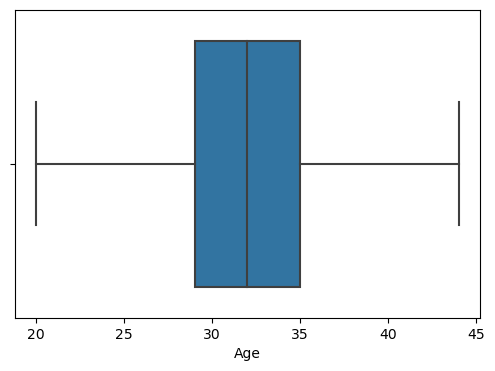

In [26]:
# Handling Outliers & Outlier treatments
Q3,Q1 = np.percentile(df_users['Age'],[75,25])
#Calculating Inter Quartile Range
IQR = Q3-Q1
#Fixing Boundaries for outliers
max = Q3+(1.5*IQR)
min = Q1-(1.5*IQR)
df_users["Age"] = np.where(df_users["Age"] > max, max, df_users['Age'])
df_users["Age"] = np.where(df_users["Age"] < min, min, df_users['Age'])

# chceking the outliers again
fig = plt.figure(figsize=(6,4))
sns.boxplot(x='Age',data=df_users)

**Visualizations**

In [27]:
# Merge the dataset

df_books_rating=df_books.merge(df_ratings,on="ISBN")
df_books_rating.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating
0,195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0
1,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5
2,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400,0
3,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676,8
4,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,41385,0


In [28]:
# Dropping unnecessary columns

df_books_rating_copy=df_books_rating.copy()
# removing null values
df_books_rating_copy.dropna(inplace=True)
df_books_rating_copy.reset_index(drop=True,inplace=True)


# as the columns ISBN has no use for the analysis also Year-Of-publication
# we can also remove the medium and small scale of a image link i.e Image-URL-S and Image-URL-M
df_books_rating_copy.drop(columns=["ISBN","Year-Of-Publication","Image-URL-S","Image-URL-M"],axis=1,inplace=True)

# we can also drop the book details where the ratings is 0 as it is not a valid rating
df_books_rating_copy.drop(index=df_books_rating_copy[df_books_rating_copy["Book-Rating"]==0].index,inplace=True)

df_books_rating_copy["Book-Title"]=df_books_rating_copy["Book-Title"].apply(lambda x: re.sub("[\W_]+"," ",x).strip())
df_books_rating_copy.head()

,Book-Title,Book-Author,Publisher,Image-URL-L,User-ID,Book-Rating
1,Clara Callan,Richard Bruce Wright,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,8,5
3,Clara Callan,Richard Bruce Wright,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,11676,8
5,Clara Callan,Richard Bruce Wright,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,67544,8
8,Clara Callan,Richard Bruce Wright,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,116866,9
9,Clara Callan,Richard Bruce Wright,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,123629,9


Text(0.5, 1.0, 'Top 20 author with number of books')

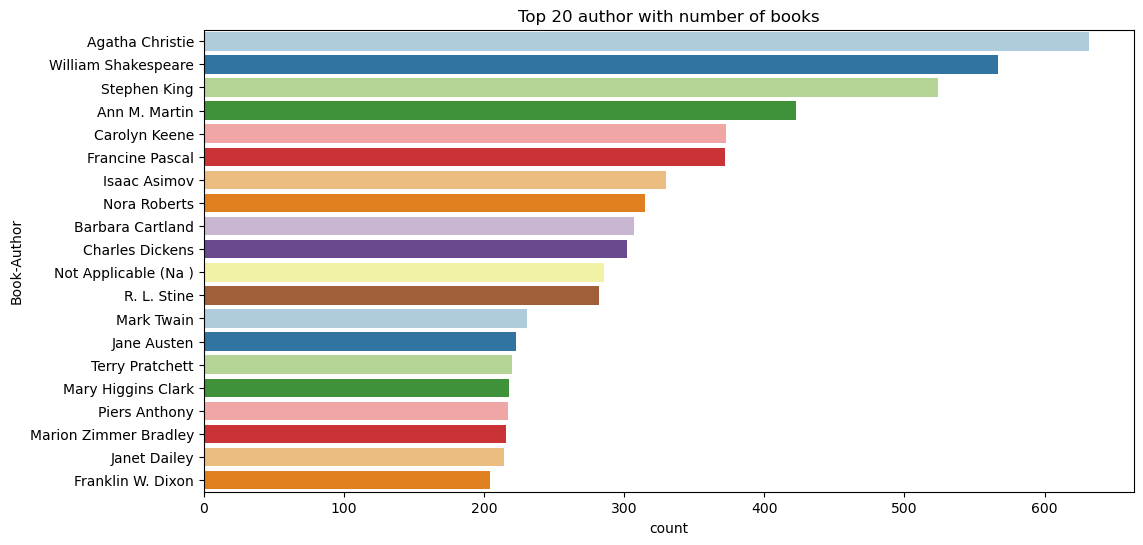

In [29]:
# Chart - 1 Top 20 author with number of books
plt.figure(figsize=(12,6))
sns.countplot(y="Book-Author",palette = 'Paired', data=df_books,order=df_books['Book-Author'].value_counts().index[0:20])
plt.title("Top 20 author with number of books")

Text(0.5, 1.0, 'Ratings')

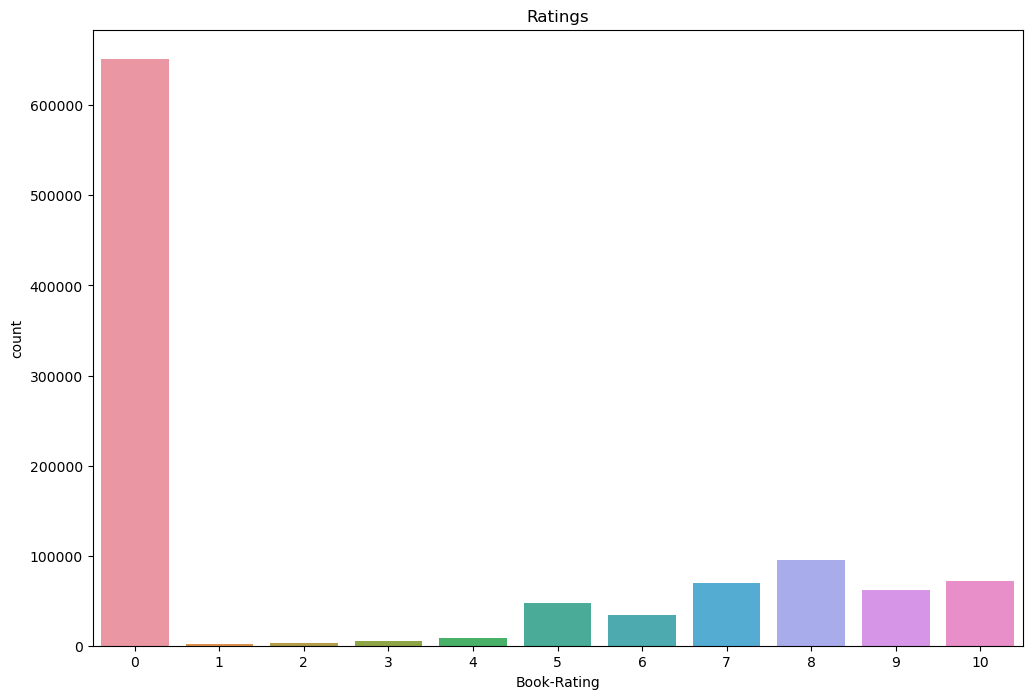

In [30]:
# Chart - 2 Plotting the rating column distribusion
plt.figure(figsize=(12,8))
sns.countplot(x="Book-Rating", data=df_ratings)
plt.title("Ratings")

In [31]:
# Finding percentage of books having 0 rating

Books_zero_rating = (len(df_books_rating[df_books_rating["Book-Rating"]==0])/len(df_books_rating))*100
print('Percentage of books with zero rating %0.2f' % Books_zero_rating)

Percentage of books with zero rating 62.61


In [32]:
# Chart - 3 Top 10 Books with highest nuumber of ratings
valid_rating=df_ratings[df_ratings['Book-Rating'] != 0]
top10_ratings=valid_rating.groupby('ISBN')['Book-Rating'].count().sort_values(ascending=False).head(10)
top10_ratings

ISBN
316666343     635
971880107     526
385504209     452
312195516     354
679781587     302
60928336      292
059035342X    285
142001740     283
446672211     265
044023722X    259
Name: Book-Rating, dtype: int64

Text(0.5, 1.0, 'Age Distribution Plot')

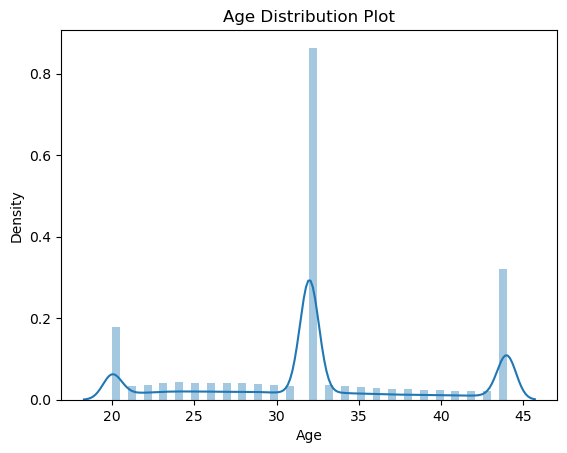

In [33]:
# Chart - 4 User Age distribution
sns.distplot(df_users.Age)
plt.title('Age Distribution Plot')

<Axes: xlabel='Age'>

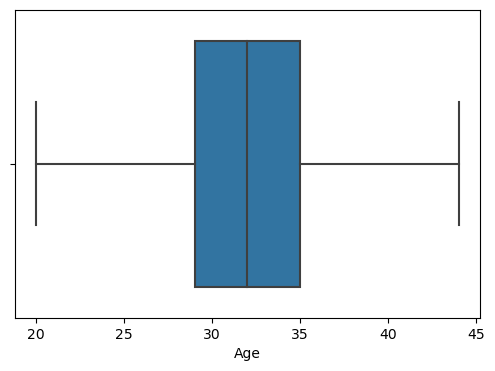

In [34]:
# Chart - 5 Checking Outliers for the Users Age column
fig = plt.figure(figsize=(6,4))
sns.boxplot(x='Age',data=df_users)

Text(0.5, 1.0, 'Top 20 author with maximum number of rating')

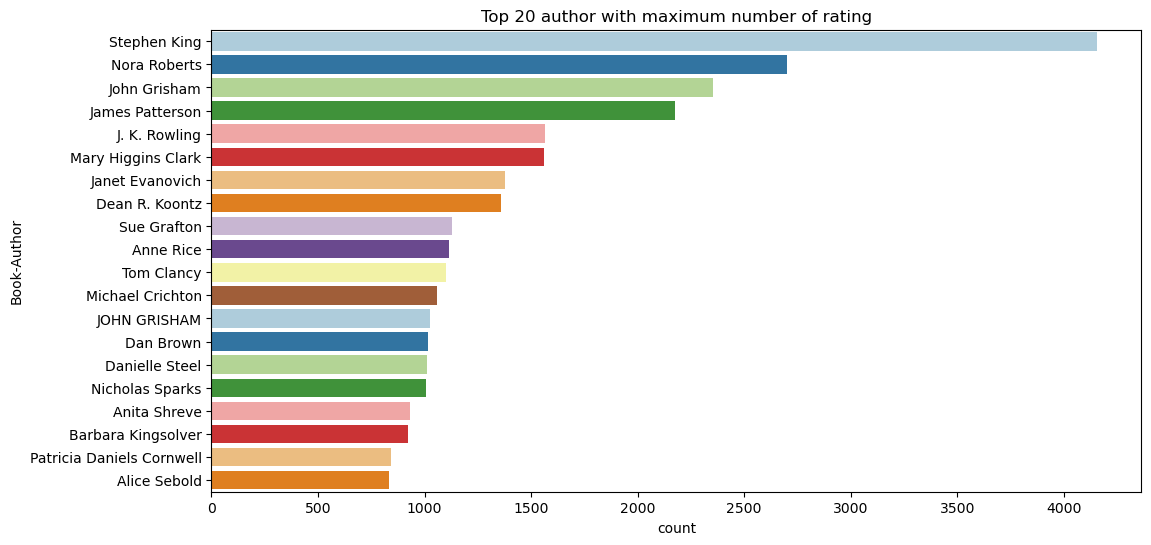

In [35]:
# Chart - 6 Top 20 authors with maximum number of ratings
plt.figure(figsize=(12,6))
sns.countplot(y="Book-Author",palette = 'Paired', data=df_books_rating_copy,order=df_books_rating_copy['Book-Author'].value_counts().index[0:20])
plt.title("Top 20 author with maximum number of rating")

<Axes: xlabel='Book-Title'>

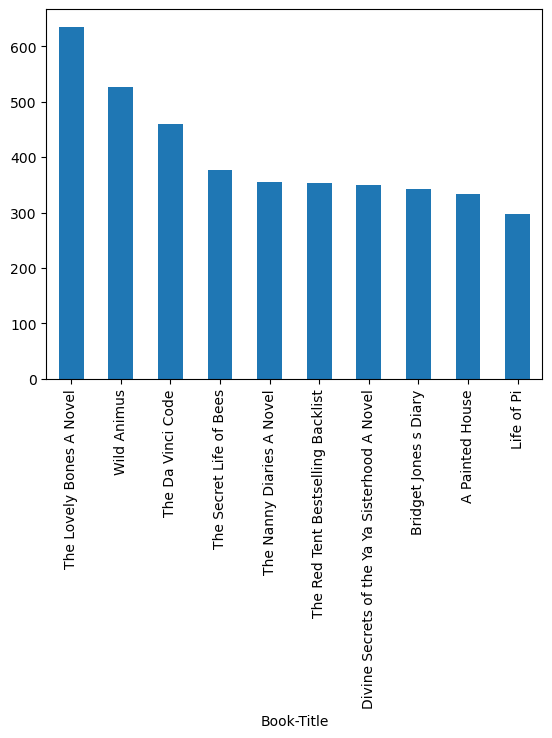

In [36]:
# Chart - 7 Top 10 books which got highest numbers of rating
df_books_rating_copy.groupby(['Book-Title'])['Book-Rating'].count().sort_values(ascending=False).head(10).plot(kind='bar')

Text(0.5, 1.0, "Top 10 'Publisher' with maximum number of rating")

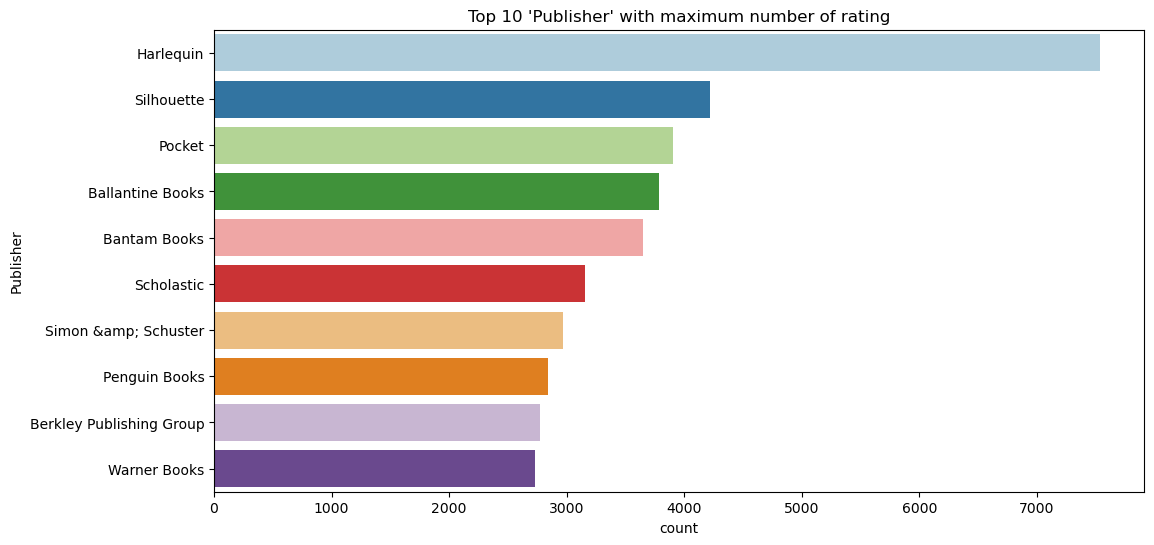

In [37]:
# Chart - 8 Top 10 publishers with maximum number of ratings
plt.figure(figsize=(12,6))
sns.countplot(y='Publisher',palette = 'Paired', data=df_books,order=df_books['Publisher'].value_counts().index[0:10])
plt.title("Top 10 'Publisher' with maximum number of rating")

**EDA ANALYSIS**

1. Average age of users is between 34-35.
2. Average rating given by users is 2.8.
3. Outliers have been handled using IQR method.
4. Missing values have been handled by replacing data with median values.
5. Wrong data in wrong columns has been handled.
6. Hariequin, Silhouette and Pocket are the top 3 publishers.
7. Books like The Lovely Bone and Wild Animus are the 2 top rated books.
8. Stephen King, Nora Roberts and John Grisham are the top 3 authors.
9. Agatha Christie, William Shakespeare and Stephen King released maximum books.
10. 62.77 percent books have 0 rating.

**MODEL BUILDING**

Popularity Based Approach

The main idea behind Popularity Based Approach is to recomend the books which are popular , the popularity can be calculated on the basis of ratings

In [38]:
ratings_with_name = df_ratings.merge(df_books,on='ISBN')
ratings_with_name

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
...,...,...,...,...,...,...,...,...,...,...
941107,250764,440106575,0,HIDDEN FIRES,JANETTE RADCLIFFE,1978,Dell,http://images.amazon.com/images/P/0440106575.0...,http://images.amazon.com/images/P/0440106575.0...,http://images.amazon.com/images/P/0440106575.0...
941108,250764,451157516,0,"Cheyenne (Fortunes West, No 2)",A.R. Riefe,1988,New Amer Library (Mm),http://images.amazon.com/images/P/0451157516.0...,http://images.amazon.com/images/P/0451157516.0...,http://images.amazon.com/images/P/0451157516.0...
941109,250764,048623715X,0,Glamorous Movie Stars of the Thirties: Paper D...,Tom Tierney,1982,Dover Publications,http://images.amazon.com/images/P/048623715X.0...,http://images.amazon.com/images/P/048623715X.0...,http://images.amazon.com/images/P/048623715X.0...
941110,250764,486256588,0,Schiaparelli Fashion Review: Paper Dolls in Fu...,Tom Tierney,1988,Dover Publications,http://images.amazon.com/images/P/0486256588.0...,http://images.amazon.com/images/P/0486256588.0...,http://images.amazon.com/images/P/0486256588.0...


In [39]:
num_rating_df = ratings_with_name.groupby('Book-Title').count()['Book-Rating'].reset_index()
num_rating_df.rename(columns={'Book-Rating':'num_ratings'},inplace=True)
num_rating_df

,Book-Title,num_ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1
...,...,...
230215,Ã?Â?l- Connection.,1
230216,Ã?Â?lpiraten.,2
230217,Ã?Â?rger mit Produkt X. Roman.,4
230218,Ã?Â?stlich der Berge.,2


In [40]:
# Convert 'Book-Rating' to numeric, forcing errors to NaN
ratings_with_name['Book-Rating'] = pd.to_numeric(ratings_with_name['Book-Rating'], errors='coerce')

# Group by 'Book-Title' and calculate the mean of 'Book-Rating'
avg_rating_df = ratings_with_name.groupby('Book-Title', as_index=False)['Book-Rating'].mean()

# Rename the column
avg_rating_df.rename(columns={'Book-Rating': 'avg_rating'}, inplace=True)

# Display the result
avg_rating_df


,Book-Title,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,2.25
1,Always Have Popsicles,0.00
2,Apple Magic (The Collector's series),0.00
3,Beyond IBM: Leadership Marketing and Finance ...,0.00
4,Clifford Visita El Hospital (Clifford El Gran...,0.00
...,...,...
230215,Ã?Â?l- Connection.,0.00
230216,Ã?Â?lpiraten.,0.00
230217,Ã?Â?rger mit Produkt X. Roman.,5.25
230218,Ã?Â?stlich der Berge.,4.00


In [41]:
popular_df = num_rating_df.merge(avg_rating_df,on='Book-Title')
popular_df

,Book-Title,num_ratings,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,4,2.25
1,Always Have Popsicles,1,0.00
2,Apple Magic (The Collector's series),1,0.00
3,Beyond IBM: Leadership Marketing and Finance ...,1,0.00
4,Clifford Visita El Hospital (Clifford El Gran...,1,0.00
...,...,...,...
230215,Ã?Â?l- Connection.,1,0.00
230216,Ã?Â?lpiraten.,2,0.00
230217,Ã?Â?rger mit Produkt X. Roman.,4,5.25
230218,Ã?Â?stlich der Berge.,2,4.00


In [42]:
popular_df = popular_df[popular_df['num_ratings']>=250].sort_values('avg_rating',ascending=False).head(50)
popular_df

,Book-Title,num_ratings,avg_rating
76830,Harry Potter and the Goblet of Fire (Book 4),346,5.945087
76842,Harry Potter and the Prisoner of Azkaban (Book 3),380,5.884211
76834,Harry Potter and the Order of the Phoenix (Boo...,316,5.544304
76822,Harry Potter and the Chamber of Secrets (Book 2),501,5.177645
182892,The Hobbit : The Enchanting Prelude to The Lor...,261,4.969349
76853,Harry Potter and the Sorcerer's Stone (Harry P...,519,4.938343
178857,The Fellowship of the Ring (The Lord of the Ri...,340,4.885294
209806,To Kill a Mockingbird,463,4.684665
175236,The Da Vinci Code,828,4.679952
172364,The Catcher in the Rye,401,4.615960


In [43]:
popular_df = popular_df.merge(df_books,on='Book-Title').drop_duplicates('Book-Title')[['Book-Title','Book-Author','Image-URL-M','num_ratings','avg_rating']]
popular_df

,Book-Title,Book-Author,Image-URL-M,num_ratings,avg_rating
0,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,http://images.amazon.com/images/P/0439139597.0...,346,5.945087
2,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,http://images.amazon.com/images/P/0439136350.0...,380,5.884211
5,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,http://images.amazon.com/images/P/043935806X.0...,316,5.544304
9,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,http://images.amazon.com/images/P/0439064872.0...,501,5.177645
12,The Hobbit : The Enchanting Prelude to The Lor...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339681.0...,261,4.969349
13,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,http://images.amazon.com/images/P/059035342X.0...,519,4.938343
15,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339703.0...,340,4.885294
24,To Kill a Mockingbird,Harper Lee,http://images.amazon.com/images/P/0446310786.0...,463,4.684665
32,The Da Vinci Code,Dan Brown,http://images.amazon.com/images/P/0385504209.0...,828,4.679952
38,The Catcher in the Rye,J.D. Salinger,http://images.amazon.com/images/P/0316769487.0...,401,4.615960


In [44]:
popular_df['Image-URL-M'][0]

'http://images.amazon.com/images/P/0439139597.01.MZZZZZZZ.jpg'

In [45]:
x = ratings_with_name.groupby('User-ID').count()['Book-Rating'] > 200
user_based = x[x].index
print(user_based)
print(x)

Index([   254,   2276,   2766,   2977,   3363,   4017,   4385,   6251,   6323,
         6543,
       ...
       249111, 249628, 249862, 249894, 250184, 250405, 250764, 277427, 277639,
       278418],
      dtype='int64', name='User-ID', length=737)
User-ID
2         False
8         False
9         False
10        False
12        False
          ...  
278846    False
278849    False
278851    False
278852    False
278854    False
Name: Book-Rating, Length: 83643, dtype: bool


In [46]:
filtered_rating = ratings_with_name[ratings_with_name['User-ID'].isin(user_based)]
filtered_rating

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
5,23768,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
7,28523,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
15,77940,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
16,81977,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
...,...,...,...,...,...,...,...,...,...,...
941107,250764,440106575,0,HIDDEN FIRES,JANETTE RADCLIFFE,1978,Dell,http://images.amazon.com/images/P/0440106575.0...,http://images.amazon.com/images/P/0440106575.0...,http://images.amazon.com/images/P/0440106575.0...
941108,250764,451157516,0,"Cheyenne (Fortunes West, No 2)",A.R. Riefe,1988,New Amer Library (Mm),http://images.amazon.com/images/P/0451157516.0...,http://images.amazon.com/images/P/0451157516.0...,http://images.amazon.com/images/P/0451157516.0...
941109,250764,048623715X,0,Glamorous Movie Stars of the Thirties: Paper D...,Tom Tierney,1982,Dover Publications,http://images.amazon.com/images/P/048623715X.0...,http://images.amazon.com/images/P/048623715X.0...,http://images.amazon.com/images/P/048623715X.0...
941110,250764,486256588,0,Schiaparelli Fashion Review: Paper Dolls in Fu...,Tom Tierney,1988,Dover Publications,http://images.amazon.com/images/P/0486256588.0...,http://images.amazon.com/images/P/0486256588.0...,http://images.amazon.com/images/P/0486256588.0...


In [47]:
y = filtered_rating.groupby('Book-Title').count()['Book-Rating']>=50
famous_books = y[y].index
famous_books

Index(['1984', '1st to Die: A Novel', '2nd Chance', '4 Blondes',
       'A Bend in the Road', 'A Case of Need',
       'A Child Called \It\": One Child's Courage to Survive"',
       'A Civil Action', 'A Day Late and a Dollar Short', 'A Fine Balance',
       ...
       'Winter Moon', 'Winter Solstice', 'Wish You Well', 'Without Remorse',
       'Wuthering Heights', 'Year of Wonders', 'You Belong To Me',
       'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
       'Zoya', '\O\" Is for Outlaw"'],
      dtype='object', name='Book-Title', length=603)

In [48]:
final_ratings = filtered_rating[filtered_rating['Book-Title'].isin(famous_books)]
final_ratings

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
56,278418,446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
58,3363,446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
59,7158,446520802,10,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
62,11676,446520802,10,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
67,23768,446520802,6,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
...,...,...,...,...,...,...,...,...,...,...
937464,245963,380781506,0,Remember Me,Danice Allen,1996,Harper Mass Market Paperbacks (Mm),http://images.amazon.com/images/P/0380781506.0...,http://images.amazon.com/images/P/0380781506.0...,http://images.amazon.com/images/P/0380781506.0...
937465,246671,380781506,0,Remember Me,Danice Allen,1996,Harper Mass Market Paperbacks (Mm),http://images.amazon.com/images/P/0380781506.0...,http://images.amazon.com/images/P/0380781506.0...,http://images.amazon.com/images/P/0380781506.0...
938778,247429,073940086X,0,Mirror Image,Danielle Steel,0,Delacorte Press,http://images.amazon.com/images/P/073940086X.0...,http://images.amazon.com/images/P/073940086X.0...,http://images.amazon.com/images/P/073940086X.0...
939428,248718,031202164X,8,Ashes to Ashes,Mary Monica Pulver,1988,Horizon Book Promotions,http://images.amazon.com/images/P/031202164X.0...,http://images.amazon.com/images/P/031202164X.0...,http://images.amazon.com/images/P/031202164X.0...


In [49]:
pt = final_ratings.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')

In [50]:
pt.fillna(0,inplace=True)

In [51]:
pt

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,249111,249628,249862,249894,250184,250405,250764,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
from sklearn.metrics.pairwise import cosine_similarity

In [53]:
similarity_scores = cosine_similarity(pt)
similarity_scores

array([[1.        , 0.11013674, 0.0127091 , ..., 0.12447747, 0.07552261,
        0.04645965],
       [0.11013674, 1.        , 0.22459428, ..., 0.07780233, 0.1752651 ,
        0.12821608],
       [0.0127091 , 0.22459428, 1.        , ..., 0.04617038, 0.05001715,
        0.11450939],
       ...,
       [0.12447747, 0.07780233, 0.04617038, ..., 1.        , 0.07085128,
        0.02054493],
       [0.07552261, 0.1752651 , 0.05001715, ..., 0.07085128, 1.        ,
        0.11104108],
       [0.04645965, 0.12821608, 0.11450939, ..., 0.02054493, 0.11104108,
        1.        ]])

In [54]:
similarity_scores.shape

(603, 603)

In [55]:
def recommend(book_name):
    # index fetch
    index = np.where(pt.index==book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:5]

    data = []
    for i in similar_items:
        item = []
        temp_df = df_books[df_books['Book-Title'] == pt.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Image-URL-M'].values))

        data.append(item)

    return data

In [56]:
recommend('Harry Potter and the Prisoner of Azkaban (Book 3)')

[['Harry Potter and the Goblet of Fire (Book 4)',
  'J. K. Rowling',
  'http://images.amazon.com/images/P/0439139597.01.MZZZZZZZ.jpg'],
 ['Harry Potter and the Chamber of Secrets (Book 2)',
  'J. K. Rowling',
  'http://images.amazon.com/images/P/0439064872.01.MZZZZZZZ.jpg'],
 ['Harry Potter and the Order of the Phoenix (Book 5)',
  'J. K. Rowling',
  'http://images.amazon.com/images/P/043935806X.01.MZZZZZZZ.jpg'],
 ["Harry Potter and the Sorcerer's Stone (Book 1)",
  'J. K. Rowling',
  'http://images.amazon.com/images/P/0590353403.01.MZZZZZZZ.jpg']]

In [57]:
pt.index[254]

'Lightning'

In [58]:
import pickle
from typing import cast, BinaryIO
pickle.dump(popular_df,open('popular.pkl','wb'))

In [59]:
df_books.drop_duplicates('Book-Title')

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,60973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271354,449906736,Flashpoints: Promise and Peril in a New World,Robin Wright,1993,Ballantine Books,http://images.amazon.com/images/P/0449906736.0...,http://images.amazon.com/images/P/0449906736.0...,http://images.amazon.com/images/P/0449906736.0...
271356,525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [60]:
pickle.dump(pt,open('pt.pkl','wb'))
pickle.dump(df_books,open('books.pkl','wb'))
pickle.dump(similarity_scores,open('similarity_scores.pkl','wb'))